# Analysis of Participant Survey

## Download raw data as recorded

In [215]:
!wget -N https://syncandshare.lrz.de/dl/fiL1hopmHPxPL3gYYT4sdn8i/sen12ms-human-few-shot-classifiers-results.json -P /tmp

--2020-09-30 23:12:49--  https://syncandshare.lrz.de/dl/fiL1hopmHPxPL3gYYT4sdn8i/sen12ms-human-few-shot-classifiers-results.json
Resolving syncandshare.lrz.de (syncandshare.lrz.de)... 129.187.255.213
Connecting to syncandshare.lrz.de (syncandshare.lrz.de)|129.187.255.213|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘/tmp/sen12ms-human-few-shot-classifiers-results.json’ not modified on server. Omitting download.



## Imports

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import cohen_kappa_score
import numpy as np
import seaborn as sns

## Clean up data

discard samples 
* with durations shorter than 1.5s
* with duration longer than 20s
* of the first 5 classifications

discard users
* with less than 20 classifications

In [217]:
minimum_duration = 1.5 # s
maximum_duration = 20 # s
warm_up_trials = 5 # discards first N classifications to get used to the system
minimum_number_of_samples_per_user = 20

data = pd.read_json("/tmp/sen12ms-human-few-shot-classifiers-results.json", lines=True).dropna()

data = data.loc[data["counter"]>warm_up_trials]
data = data.loc[data["duration"]>minimum_duration]
data = data.loc[data["duration"]<maximum_duration]


# list of uuids that have been sent out to participants
valid_userids = [
    "12ea7ec6-bf22-432f-b1a9-30d7395396d8",
    "fa98ff24-2bf4-4967-b291-5626fec8e4b7",
    "671c4e62-de3e-4dbb-9646-9ed6b0a8fd54",
    "1a8005da-b2a3-4825-b74f-3207340e0a5a",
    "63a86981-501f-4882-afa3-9b4f4b774514",
    "fb8976d0-ac30-4e55-8e27-608adafdfe94",
    "3e2d6899-4651-4c56-a7b8-676bfe687a8b",
    "249d4476-8b5e-420b-b74d-3ea5a41a0b25",
    "2fb5478c-f113-434e-af84-2dae4c699478",
    "60cc0419-3519-4575-9b1a-7d2158dc406e",
    "f2440f7f-52a2-4045-930a-bc01db4913b1",
    "e52c04a0-12c0-4019-91f3-cf08a51698d9",
    "a1c7a12a-d97e-4b88-a6c4-33d663ec644f",
    "78c48be2-8e12-435e-9e13-3946ee870c11",
    "b044ed23-a222-421c-a10b-aead3d7c5f21",
    "646f8e8f-ca02-4ed9-8275-4e2da6dd6a3e",
    "cf321f5a-692a-4998-9447-5c7e3802ca3c",
    "5ec423cf-a19e-4c33-bc39-4d4743c2fbda",
    "f37eb59e-a52b-4a7a-bf25-dd8f324d7609",
    "e4919242-f24a-4b35-8ace-59ec41d88b98",
    "07413432-1e3d-427b-b245-412574262bcc",
    "e0e10f09-0fba-4dbc-a26d-547a3d6605b6",
    "78714b94-f853-4ecb-8ff7-40ae03fe91ca",
    "12f40961-b787-45c7-999a-ca2c6b45f523",
    "1cb6f952-822a-4742-a654-68e41a946ade",
    "3a67768b-28ae-4717-92bf-45f9aa928ec6",
    "e1381777-be6a-4f35-bf26-ba99b0dbe1cb"
]

data = data.loc[data.userid.isin(valid_userids)]

In [218]:

def calculate_accuracy(data):
    correct_bool = data["true_class"] == data["selected_class"]
    return correct_bool.mean()

def calculate_kappa(data):
    return cohen_kappa_score(data["true_class"], data["selected_class"])

accuracies = pd.DataFrame(data.groupby("userid").apply(calculate_accuracy)).rename(columns={0: "accuracy"})
accuracies["kappa"] = pd.DataFrame(data.groupby("userid").apply(calculate_kappa))
accuracies["counts"] = data.groupby("userid")["true_class"].count()
accuracies["duration"] = data.groupby("userid")["duration"].mean()
accuracies["duration_std"] = data.groupby("userid")["duration"].std()

accuracies = accuracies.loc[accuracies["counts"] > minimum_number_of_samples_per_user]

/home/marc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:604: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


## Overall Classification performance

In [219]:
from sklearn.metrics import classification_report
print(classification_report(data["true_class"], data["selected_class"]))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60       201
           1       0.62      0.60      0.61       239
           2       0.68      0.67      0.68       237
           3       0.61      0.61      0.61       216

    accuracy                           0.62       893
   macro avg       0.62      0.62      0.62       893
weighted avg       0.62      0.62      0.62       893



In [220]:

accuracies["participant"] = np.arange(len(accuracies)) + 1

In [221]:
accuracies

,accuracy,kappa,counts,duration,duration_std,participant
userid,,,,,,
07413432-1e3d-427b-b245-412574262bcc,0.772727,0.693807,44,5.842750,2.640952,1
12ea7ec6-bf22-432f-b1a9-30d7395396d8,0.750000,0.636694,40,10.479375,4.366467,2
12f40961-b787-45c7-999a-ca2c6b45f523,0.511628,0.357752,43,6.103930,2.955140,3
1a8005da-b2a3-4825-b74f-3207340e0a5a,0.705882,0.609195,34,4.854000,3.649322,4
2fb5478c-f113-434e-af84-2dae4c699478,0.609756,0.482242,41,7.357415,3.930501,5
3a67768b-28ae-4717-92bf-45f9aa928ec6,0.659091,0.532247,44,4.376273,2.699180,6
3e2d6899-4651-4c56-a7b8-676bfe687a8b,0.604651,0.472202,43,3.755279,2.088736,7
5ec423cf-a19e-4c33-bc39-4d4743c2fbda,0.416667,0.201690,36,3.861472,3.087294,8
60cc0419-3519-4575-9b1a-7d2158dc406e,0.472222,0.295572,36,3.585722,2.334845,9


## median

In [222]:
median = accuracies.median()
median

accuracy         0.609756
kappa            0.482242
counts          41.000000
duration         5.842750
duration_std     3.373856
participant     11.000000
dtype: float64

## single best

In [223]:
accuracies.sort_values(by="accuracy", ascending=False).iloc[0]

accuracy         0.772727
kappa            0.693807
counts          44.000000
duration         5.842750
duration_std     2.640952
participant      1.000000
Name: 07413432-1e3d-427b-b245-412574262bcc, dtype: float64

## single worst

In [224]:
accuracies.sort_values(by="accuracy", ascending=False).iloc[-1]

accuracy         0.416667
kappa            0.201690
counts          36.000000
duration         3.861472
duration_std     3.087294
participant      8.000000
Name: 5ec423cf-a19e-4c33-bc39-4d4743c2fbda, dtype: float64

## best 25%

In [225]:
best_fraction = 0.25

N = len(accuracies)

print(int(N*best_fraction))
best_25_df = accuracies.sort_values(by="accuracy", ascending=False).iloc[:int(N*best_fraction)]
best_25 = best_25_df.mean()

best_index = best_25_df.index
best_25

5


accuracy         0.749568
kappa            0.657968
counts          39.400000
duration         7.138468
duration_std     3.775861
participant      6.800000
dtype: float64

## worst 25%

In [226]:
worst_fraction = 0.25

N = len(accuracies)
accuracies.sort_values(by="accuracy", ascending=True).iloc[:int(N*worst_fraction)].mean()

accuracy         0.491032
kappa            0.313495
counts          41.200000
duration         4.061355
duration_std     2.291813
participant     10.800000
dtype: float64

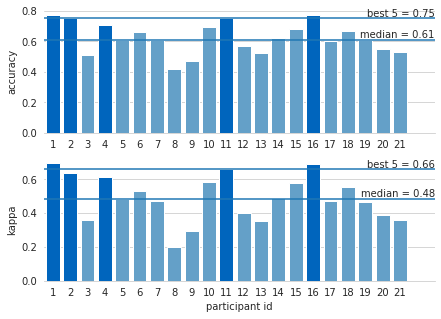

In [227]:
sns.set_style("whitegrid")

color="#64a0c8"
bestcolor="#0065bd"

axmax = 1
textx = 23

fig,axs = plt.subplots(2,1, sharex=False, figsize=(7,5))
ax = axs[0]
ax.set_ylabel("accuracy")
ax.bar(x=accuracies["participant"],height=accuracies["accuracy"], color=color)
ax.bar(x=accuracies.loc[best_index]["participant"],height=accuracies.loc[best_index]["accuracy"], color=bestcolor)


# annotations
field = "accuracy"
ax.axhline(y=best_25[field], xmin=0, xmax=axmax)
ax.text(textx, best_25[field], f"best 5 = {best_25[field]:.2f}", horizontalalignment='right', verticalalignment='bottom')

ax.axhline(y=median[field], xmin=0, xmax=axmax)
ax.text(textx, median[field], f"median = {median[field]:.2f}", horizontalalignment='right', verticalalignment='bottom')


ax = axs[1]
ax.set_ylabel("kappa")
ax.bar(x=accuracies["participant"],height=accuracies["kappa"], color=color)
ax.bar(x=accuracies.loc[best_index]["participant"],height=accuracies.loc[best_index]["kappa"], color=bestcolor)


# kappa
field = "kappa"
ax.axhline(y=best_25[field], xmin=0, xmax=axmax)
ax.text(textx, best_25[field], f"best 5 = {best_25[field]:.2f}", horizontalalignment='right', verticalalignment='bottom')

ax.axhline(y=median[field], xmin=0, xmax=axmax)
ax.text(textx, median[field], f"median = {median[field]:.2f}", horizontalalignment='right', verticalalignment='bottom')

"""
ax = axs[2]
ax.set_ylabel("#classifications")
ax.bar(x=accuracies["participant"],height=accuracies["counts"], color=color)
ax.bar(x=accuracies.loc[best_index]["participant"],height=accuracies.loc[best_index]["counts"], color=bestcolor)

ax = axs[3]
ax.set_ylabel("duration [sec]")
ax.bar(x=accuracies["participant"],height=accuracies["duration"], color=color, label="remaining")
ax.bar(x=accuracies.loc[best_index]["participant"],height=accuracies.loc[best_index]["duration"], color=bestcolor, label="best 5")
#ax.legend(loc="lower right")
#plt.xticks(rotation='vertical')
#ax.set_xlim(0.5,len(accuracies) + 0.5)
"""

for ax in axs:
    ax.xaxis.grid()
    ax.set_xticks(np.arange(1,len(accuracies) + 1))
    ax.set_xlim(0.5,len(accuracies) + 1.5 + 0.5)

axs[-1].set_xlabel("participant id")

fig.align_ylabels(axs)

sns.despine(fig=fig)
sns.despine(left=True)

fig.savefig("/tmp/sen12ms-participants-survey.pdf", background="transparent", bbox_inches='tight', dpi=300)

In [228]:
table = accuracies.set_index("participant")[["accuracy","kappa","counts", "duration"]]
table.rename(columns={"counts":"classifications", "duration": "average duration [sec]"}, inplace=True)
table

,accuracy,kappa,classifications,average duration [sec]
participant,,,,
1,0.772727,0.693807,44,5.842750
2,0.750000,0.636694,40,10.479375
3,0.511628,0.357752,43,6.103930
4,0.705882,0.609195,34,4.854000
5,0.609756,0.482242,41,7.357415
6,0.659091,0.532247,44,4.376273
7,0.604651,0.472202,43,3.755279
8,0.416667,0.201690,36,3.861472
9,0.472222,0.295572,36,3.585722


In [229]:
print(table.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
{} &  accuracy &  kappa &  classifications &  average duration [sec] \\
participant &           &        &                  &                         \\
\midrule
1           &      0.77 &   0.69 &               44 &                    5.84 \\
2           &      0.75 &   0.64 &               40 &                   10.48 \\
3           &      0.51 &   0.36 &               43 &                    6.10 \\
4           &      0.71 &   0.61 &               34 &                    4.85 \\
5           &      0.61 &   0.48 &               41 &                    7.36 \\
6           &      0.66 &   0.53 &               44 &                    4.38 \\
7           &      0.60 &   0.47 &               43 &                    3.76 \\
8           &      0.42 &   0.20 &               36 &                    3.86 \\
9           &      0.47 &   0.30 &               36 &                    3.59 \\
10          &      0.69 &   0.58 &               39 &                    3.90